In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout,LSTM
from numpy.random import seed
from math import sqrt
from sklearn.preprocessing import MinMaxScaler

In [173]:
data=pd.read_excel("admission.xlsx")
data.head()

,Diseases,january,Unnamed: 2,Unnamed: 3,february,Unnamed: 5,Unnamed: 6,March,Unnamed: 8,Unnamed: 9,...,Unnamed: 27,October,Unnamed: 29,Unnamed: 30,November,Unnamed: 32,Unnamed: 33,December,Unnamed: 35,Unnamed: 36
0,NaN,Total patients,Discharged,Died,Total patients,Discharged,Died,Total patients,Discharged,Died,...,Died,Total patients,Discharged,Died,Total patients,Discharged,Died,Total patients,Discharged,Died
1,Refused testing/died before testing,40,24,16,39,23,16,37,22,15,...,18,45,22,23,41,23,18,37,22,15
2,Cerebral palsy,116,99,17,119,102,17,120,104,16,...,31,122,102,20,112,89,23,121,104,17
3,Severe pneumonia,193,153,40,201,145,56,195,151,44,...,51,189,148,41,189,149,40,189,145,44
4,Severe anemia,26,22,4,21,19,2,24,21,3,...,11,31,19,12,27,16,11,29,17,12


In [174]:
def rea_arange_data(data,month):
    print(data)
    return 

df=pd.DataFrame({'Disease':[],'Month':[],"Total  patients":[],"Discharged":[],"Died":[]})
diseases=data['Diseases'].drop(index=0).dropna()
for i in range(1,data.columns.size,3):
    v=data[data.columns[i:i+3]].dropna()
    month=data.columns[i]
    v.columns=v.iloc[0]
    v.drop(index=0,inplace=True)
    v["Disease"]=diseases
    v["Month"]=[month for j in range(diseases.size)]
    df = pd.concat([df, v], ignore_index=True)


In [175]:
# df.to_excel("Data.xlsx",index=False)
df.size

960

In [176]:
df['Disease']=df["Disease"].astype('category').cat.codes
df['Month'] =df["Month"].astype('category').cat.codes

X=df.iloc[:,:2]
Y=df.iloc[:,-3:]

Create Model

In [177]:
scaler = MinMaxScaler(feature_range=(0, 1))
Y_Scaled= scaler.fit_transform(Y.values)
x_train,x_test,y_train,y_test=train_test_split(X,Y_Scaled,test_size=0.2)


In [178]:
random_forest_model=RandomForestRegressor(n_estimators=200,criterion="poisson")
random_forest_model.fit(x_train,y_train)
random_forest_predict=random_forest_model.predict(x_test)
score= r2_score(y_test,random_forest_predict)
score

0.995773452025317

In [179]:
random_forest_predict= scaler.inverse_transform(random_forest_predict)
s_y_test = scaler.inverse_transform(y_test)

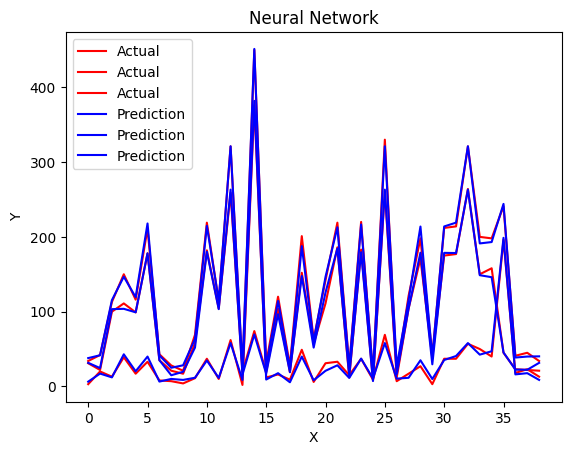

In [180]:
plt.plot( s_y_test, label='Actual', color='red')
plt.plot(random_forest_predict, label='Prediction', color='blue')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Neural Network')
plt.show()

In [196]:
model = Sequential()
model.add(Dense(32,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(3))
model.compile(loss="mse", optimizer="adam")

# Train the model
model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test),verbose=False)

# Make predictions
y_pred = model.predict(x_test)

# Invert scaling for actual values
y_pred= scaler.inverse_transform(y_pred)
s_y_test= scaler.inverse_transform(y_test)

2/2 [==============================] - 2s 14ms/step


In [197]:
r2_score(s_y_test,y_pred)

0.7715004123371569

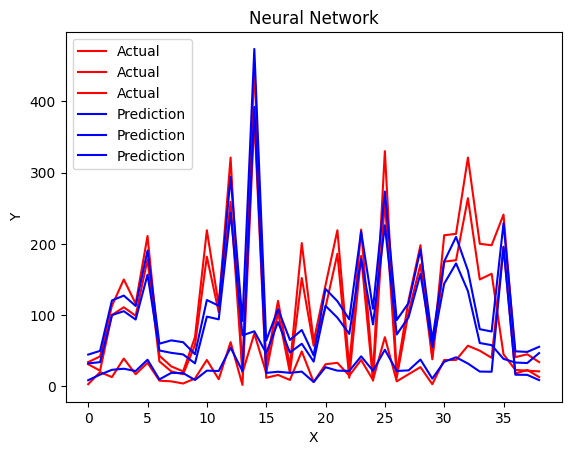

In [198]:
plt.plot( s_y_test, label='Actual', color='red')
plt.plot(y_pred, label='Prediction', color='blue')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Neural Network')
plt.show()